In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
def dict_size(dict):
    total_count = sum(len(values) for values in dict.values())
    print(total_count)

In [50]:
def check_accuracy(csv_path, dict):

    dict = {key.lower(): [vehicle.lower() for vehicle in vehicles] for key, vehicles in dict.items()}
    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])
    data['label'] = data['label'].str.strip().str.lower()

    count = 0
    total = 0

    for index, row in data.iterrows():

        path_parts = row['file_path'].split('/')
        if len(path_parts) > 2:
            name = path_parts[-2].strip().lower()[:-1]  

            # Check if the label and vehicle name match in the dictionary
            if row['label'] in dict and name in dict[row['label']]:
                count += 1
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)

In [51]:
def base_accuracy(csv_path):
    vehicles = [
   "Auto Rickshaw", "Bike", "Car", "Motorcycle", "Plane", "Ship", "Train"
]

    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])

    # Strip and convert labels to lowercase
    data['label'] = data['label'].str.strip().str.lower()

    count = 0
    total = 0

    for index, row in data.iterrows():

        path_parts = row['file_path'].split('/')
        if len(path_parts) > 2:
            vehicle_name = path_parts[-2].strip().lower()[:-1]  

            # Check if the label and vehicle name match in the dictionary
            if row['label'] in vehicle_name:
                count += 1
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)

In [52]:
print(base_accuracy("v7base.csv"))

96.73


# Air,land,ground

In [53]:
ALG_dict = {"Air Vehicle": ["plane"], 
               "Land Vehicle": ["auto rickshaw", "bike", "car", "motorcycle", "train"], 
               "Water Vehicle": ["ship"]}

print(check_accuracy("ALG.csv", ALG_dict))

80.74


# Wheels or not

# Amount of Wheels

In [55]:
amount_wheels_dict = {"Vehicle with 2 Wheels" : ["bike", "motorcycle"],
                      "Vehicle with 3 Wheels" : ["auto rickshaw"],
                      "Vehicle with 4 Wheels" : ["car"],
                      "Vehicle with more than 4 Wheels" : ["train", "plane"],
                      "Vehicle with 0 Wheels" : ["ship"]}

print(check_accuracy("amount_wheels.csv", amount_wheels_dict))

47.35


In [ ]:
category_counts = {
    7: base_accuracy("v7base.csv"),
    3: check_accuracy("ALG.csv", ALG_dict),
    5: check_accuracy("amount_wheels.csv", amount_wheels_dict)
}

amount_categories = []
accuracies = []

In [57]:
#Calculate accuracy for each category count
for count, accuracy in category_counts.items():

        if isinstance(accuracy, list):
                for each in accuracy:
                    amount_categories.append(count)
                    accuracies.append(each)
        else:
                amount_categories.append(count)
                accuracies.append(accuracy)

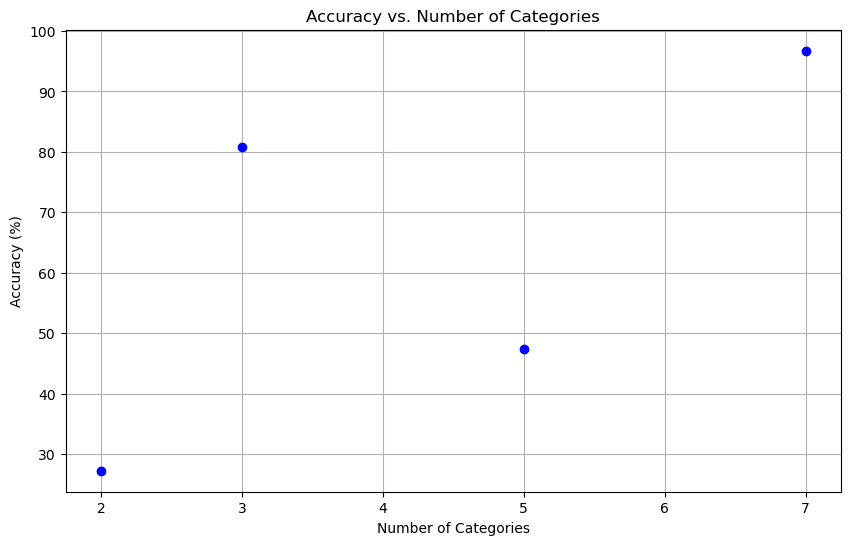

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(amount_categories, accuracies, marker='o', linestyle='None', color='blue')
plt.xlabel('Number of Categories')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Number of Categories')
plt.grid()
plt.show()